In [2]:
#standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#modeling imports
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, Normalizer

#metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score
from sklearn import metrics

#set a random seed to guarantee reproducible results
import random
random.seed(48)

#Set color palette for visualizations
sns.set_palette(sns.color_palette('Dark2'))


In [3]:
# import training and testing data, which was cleaned in notebook_1

model_train_df = pd.read_csv('../data/transformed_data/model_train_df.csv')
model_test_df = pd.read_csv('../data/transformed_data/model_test_df.csv')

In [16]:
# a function for scoring and pulling model metrics

def model_metrics(some_lr, scaled=False):

    if scaled:
        train_r2 = some_lr.score(X_train_sc, y_train)
        test_r2 = some_lr.score(X_test_sc, y_test)
        
    else:
        train_r2 = some_lr.score(X_train, y_train)
        test_r2 = some_lr.score(X_test, y_test)
    preds = some_lr.predict(X)
    resids_mean = (y - preds).mean()
    mae = metrics.mean_absolute_error(y, preds)
    resids = resids = y - preds
    rss = (resids ** 2).sum()
    mse = metrics.mean_squared_error(y, preds)
    rmse = np.sqrt(metrics.mean_squared_error(y, preds))
    cvs = cross_val_score(some_lr, X, y, cv=5).mean()
    f1 = f1_score(y, preds)
    class_report = classification_report(y, preds)
    print(class_report)

    final_dict={'Train R2 Score': train_r2,
                'Test R2 Score' : test_r2,
                'Mean of Residuals': resids_mean,
               'Mean Absolute Error': mae,
               'Residual Sum of Squares': rss,
               'Mean Squared Error': mse,
               'Root Mean Squared Error': rmse,
               'cross_val_score': cvs,
               'f1': f1}
    return final_dict

# a function to produce classification report

def class_report(model, x=X_test_data, y=y_test_data):
    preds = model.predict(x)
    class_report = classification_report(y, preds)
    print(class_report)

In [5]:
X = model_train_df.drop(columns = ['target'])
y = model_train_df['target']

X_test_data = model_test_df.drop(columns = ['target'])
y_test_data = model_test_df['target']

In [6]:
y.value_counts(normalize=True)

0    0.937942
1    0.062058
Name: target, dtype: float64

In [7]:
y_test_data.value_counts(normalize=True)

0    0.937942
1    0.062058
Name: target, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, stratify=y, random_state=48)

In [9]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [12]:
model_metrics(nb)

              precision    recall  f1-score   support

           0       0.99      0.70      0.82    187141
           1       0.16      0.86      0.27     12382

    accuracy                           0.71    199523
   macro avg       0.57      0.78      0.54    199523
weighted avg       0.94      0.71      0.78    199523



{'Train R2 Score': 0.7099404132093334,
 'Test R2 Score': 0.7070114769708816,
 'Mean of Residuals': -0.2723796254065947,
 'Mean Absolute Error': 0.29035249069029634,
 'Residual Sum of Squares': 57932,
 'Mean Squared Error': 0.29035249069029634,
 'Root Mean Squared Error': 0.5388436607127306,
 'cross_val_score': 0.7100534937527551,
 'f1': 0.2677031980786247}

In [17]:
class_report(nb)

              precision    recall  f1-score   support

           0       0.99      0.70      0.82    187141
           1       0.16      0.86      0.27     12382

    accuracy                           0.71    199523
   macro avg       0.57      0.78      0.54    199523
weighted avg       0.94      0.71      0.78    199523



In [14]:
logreg = LogisticRegression(max_iter=100_000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [15]:
model_metrics(logreg)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    187141
           1       0.66      0.24      0.35     12382

    accuracy                           0.95    199523
   macro avg       0.80      0.62      0.66    199523
weighted avg       0.93      0.95      0.93    199523



{'Train R2 Score': 0.9451188951383861,
 'Test R2 Score': 0.9445196211096076,
 'Mean of Residuals': 0.03940397848869554,
 'Mean Absolute Error': 0.054941034366965215,
 'Residual Sum of Squares': 10962,
 'Mean Squared Error': 0.054941034366965215,
 'Root Mean Squared Error': 0.23439503912618376,
 'cross_val_score': 0.9450238747408013,
 'f1': 0.3514376996805112}

In [83]:
logreg.score(X_test_data, y_test_data)

0.9450589656330348

In [18]:
class_report(logreg)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    187141
           1       0.66      0.24      0.35     12382

    accuracy                           0.95    199523
   macro avg       0.80      0.62      0.66    199523
weighted avg       0.93      0.95      0.93    199523



In [19]:
class_report(logreg, X_test, y_test)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     18715
           1       0.64      0.24      0.35      1238

    accuracy                           0.94     19953
   macro avg       0.80      0.62      0.66     19953
weighted avg       0.93      0.94      0.93     19953



In [20]:
coef = list(logreg.coef_)
features = list(X.columns)
income_coef = pd.DataFrame(zip(features, coef[0]), columns=['Feature', 'Coefficient'],index=features).drop(columns='Feature').sort_values(by='Coefficient', ascending=False)
income_coef

,Coefficient
veterans_benefits,0.559045
stock_dividends,0.543852
age,0.527804
num_employed,0.100315
weeks_worked,0.051261
occupation_major,0.039828
education,0.034443
employment_status,0.026645
household_summary,0.023859
industry_detailed,0.005430


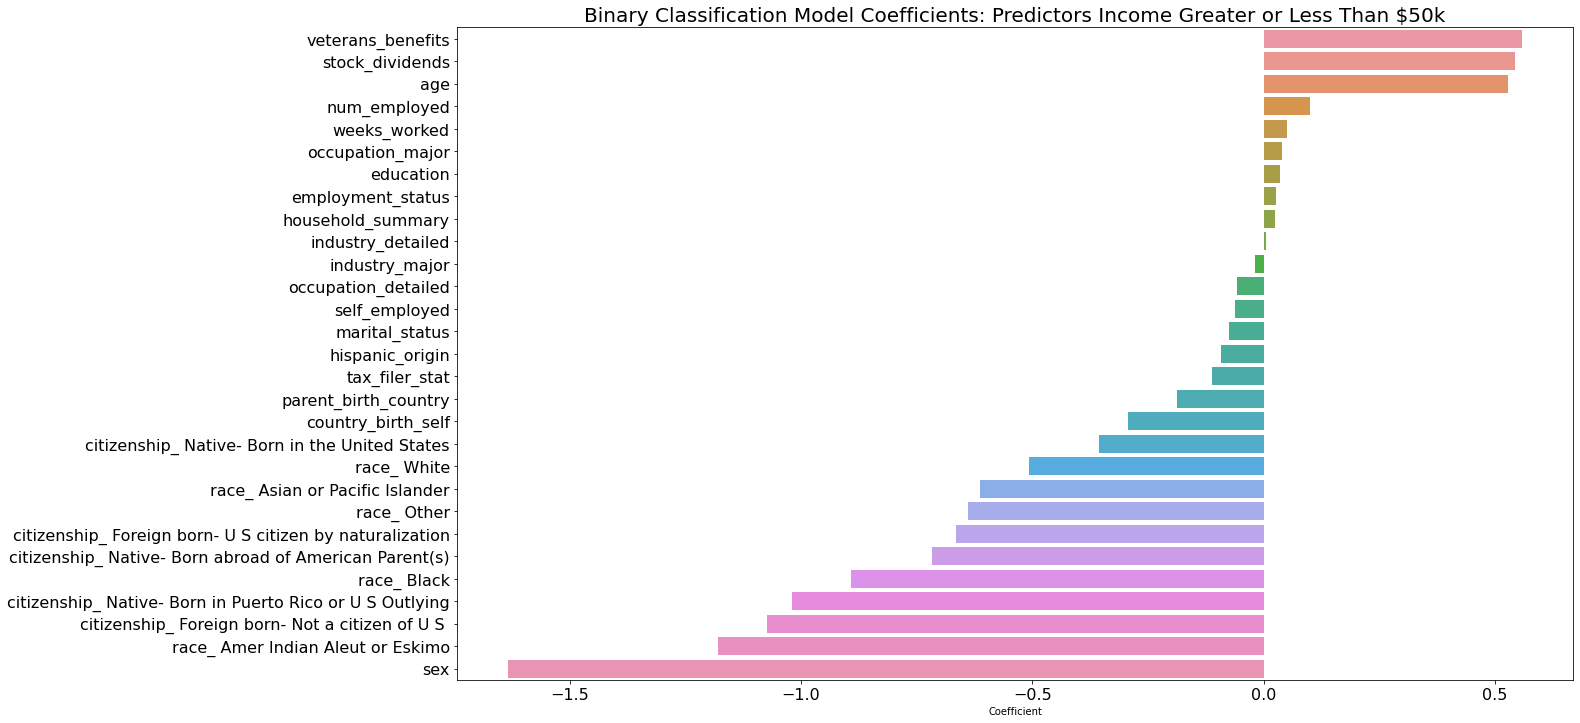

In [21]:
fig_dims = (20, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y = income_coef.index, x=income_coef['Coefficient'], ax=ax)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Binary Classification Model Coefficients: Predictors Income Greater or Less Than $50k', fontsize=20);

<Figure size 1440x1440 with 0 Axes>

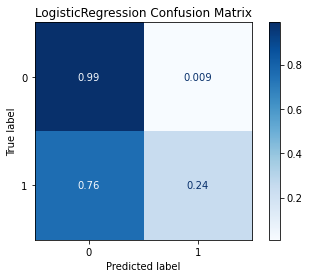

In [22]:
# Training Data

plt.figure(figsize=(20, 20))
plot_confusion_matrix(logreg, X_test, y_test, cmap='Blues', normalize='true')
plt.title('LogisticRegression Confusion Matrix');

<Figure size 1440x1440 with 0 Axes>

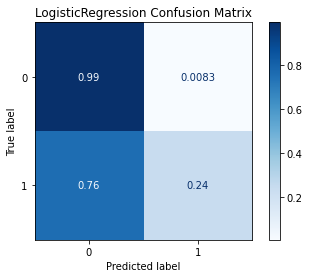

In [23]:
# Testing Data

plt.figure(figsize=(20, 20))
plot_confusion_matrix(logreg, X_test_data, y_test_data, cmap='Blues', normalize='true')
plt.title('LogisticRegression Confusion Matrix');

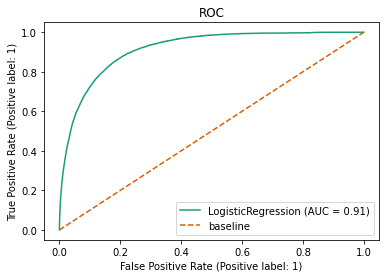

In [24]:
#ROC plot code is from General Assembly lesson 4.05.
plot_roc_curve(logreg, X_test_data, y_test_data)
plt.plot([0,1], [0,1], label = 'baseline', linestyle= '--')
plt.title('ROC')
plt.legend();

In [42]:
rf = RandomForestClassifier(random_state=48)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=48)

In [43]:
model_metrics(rf)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    187141
           1       0.95      0.86      0.90     12382

    accuracy                           0.99    199523
   macro avg       0.97      0.93      0.95    199523
weighted avg       0.99      0.99      0.99    199523



{'Train R2 Score': 0.9929665311577658,
 'Test R2 Score': 0.9445196211096076,
 'Mean of Residuals': 0.006084511560070769,
 'Mean Absolute Error': 0.011878329816612621,
 'Residual Sum of Squares': 2370,
 'Mean Squared Error': 0.011878329816612621,
 'Root Mean Squared Error': 0.10898775076407725,
 'cross_val_score': 0.9461265027545874,
 'f1': 0.8993630573248408}

In [44]:
class_report(rf)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    187141
           1       0.95      0.86      0.90     12382

    accuracy                           0.99    199523
   macro avg       0.97      0.93      0.95    199523
weighted avg       0.99      0.99      0.99    199523



In [45]:
f1_score(y_test_data, rf.predict(X_test_data))

0.8993630573248408

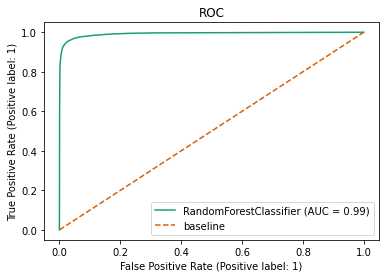

In [46]:
#ROC plot code is from General Assembly lesson 4.05.
plot_roc_curve(rf, X_test_data, y_test_data)
plt.plot([0,1], [0,1], label = 'baseline', linestyle= '--')
plt.title('ROC')
plt.legend();

<Figure size 1440x1440 with 0 Axes>

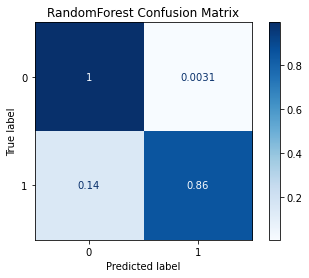

In [47]:
# Testing Data

plt.figure(figsize=(20, 20))
plot_confusion_matrix(rf, X_test_data, y_test_data, cmap='Blues', normalize='true')
plt.title('RandomForest Confusion Matrix');

In [18]:
#Gridsearch of randomforest model will take a significant amount of time to run. Unccoment the code below to run this gridsearch

# rf_params = {
#     'criterion': ['gini','entropy'],
#     'min_samples_split': [2, 4],
#     'n_estimators': [3, 5],
#     'class_weight': ['balanced', 'balanced_subsample'],
#     'ccp_alpha': [.0001, .001, .01, .1]

# }

# rf_gridsearch = GridSearchCV(RandomForestClassifier(), 
#                               rf_params, 
#                               cv=5, 
#                               verbose=1)

# rf_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0.0001, 0.001, 0.01, 0.1],
                         'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 4], 'n_estimators': [3, 5]},
             verbose=1)

In [19]:
#uncomment code below to get best_param from rf gridsearch

# rf_gridsearch.best_params_

{'ccp_alpha': 0.0001,
 'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'min_samples_split': 2,
 'n_estimators': 5}

In [20]:
#uncomment code below to get best_score from rf gridsearch

# rf_gridsearch.best_score_

0.9039895245758061

In [ ]:
estimators = [('knn', KNeighborsClassifier(p=1)),
              ('tree', DecisionTreeClassifier(random_state=42))]

stacks = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(), cv=3)

stacks.fit(X_train, y_train)


In [ ]:
stacks.score(X_test_data, y_test_data)

In [65]:
#transforming data in preparation for KNN model
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [69]:
knn = KNeighborsClassifier(p=1)
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(p=1)

In [70]:
knn.score(X_test, y_test)

0.8716483736781436

In [71]:
knn.score(X_train, y_train)

0.8688867850977334